# Email Spam Detection With Machine learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data= pd.read_csv("spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])

In [3]:
data.head

<bound method NDFrame.head of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [4]:
data.info

<bound method DataFrame.info of      label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [5]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data['message'] = data['message'].str.replace(r'\d+', 'num')
data['message'] = data['message'].str.replace(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenum')
data['message'] = data['message'].str.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr')
data['message'] = data['message'].str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr')
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.label = data.label.map({"ham":0, "spam":1})

In [8]:
data.label.value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.message, 
                                                    data.label, 
                                                    test_size=0.2,
                                                    random_state=99)

In [10]:
x_train

942     How about getting in touch with folks waiting ...
2003    S....s...india going to draw the series after ...
4595    Carlos is down but I have to pick it up from h...
5497    SMS SERVICES. for your inclusive text credits,...
2485    Lol that's different. I don't go trying to fin...
                              ...                        
1768    How. Its a little difficult but its a simple w...
1737    I cant pick the phone right now. Pls send a me...
3240      Ok i've sent u da latest version of da project.
5305    \Hi missed your Call and my mumHas beendroppin...
4737    I bought the test yesterday. Its something tha...
Name: message, Length: 4457, dtype: object

In [11]:
x_test

1661    You aren't coming home between class, right? I...
2718    18 days to Euro2004 kickoff! U will be kept in...
2409    Aww that's the first time u said u missed me w...
2385    Someone has contacted our dating service and e...
1462    09066362231 URGENT! Your mobile No 07xxxxxxxxx...
                              ...                        
3044    Hello, yeah i've just got out of the bath and ...
94      Havent planning to buy later. I check already ...
5301                  At WHAT TIME should i come tomorrow
2282                        Whom you waited for yesterday
3580                                         Ard 4 lor...
Name: message, Length: 1115, dtype: object

In [12]:
y_train

942     1
2003    0
4595    0
5497    1
2485    0
       ..
1768    0
1737    0
3240    0
5305    0
4737    0
Name: label, Length: 4457, dtype: int64

In [13]:
y_test

1661    0
2718    1
2409    0
2385    1
1462    1
       ..
3044    0
94      0
5301    0
2282    0
3580    0
Name: label, Length: 1115, dtype: int64

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

couvec = TfidfVectorizer()
couvec.fit(x_train)

TfidfVectorizer()

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_train_vectorized = couvec.transform(x_train)
X_test_vectorized = couvec.transform(x_test)


classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


y_pred = classifier.predict(X_test_vectorized)

In [16]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
con_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [18]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.07%


In [19]:
print('\nConfusion Matrix:')
print(con_matrix)


Confusion Matrix:
[[961   0]
 [ 55  99]]


In [20]:
print('\nClassification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       1.00      0.64      0.78       154

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



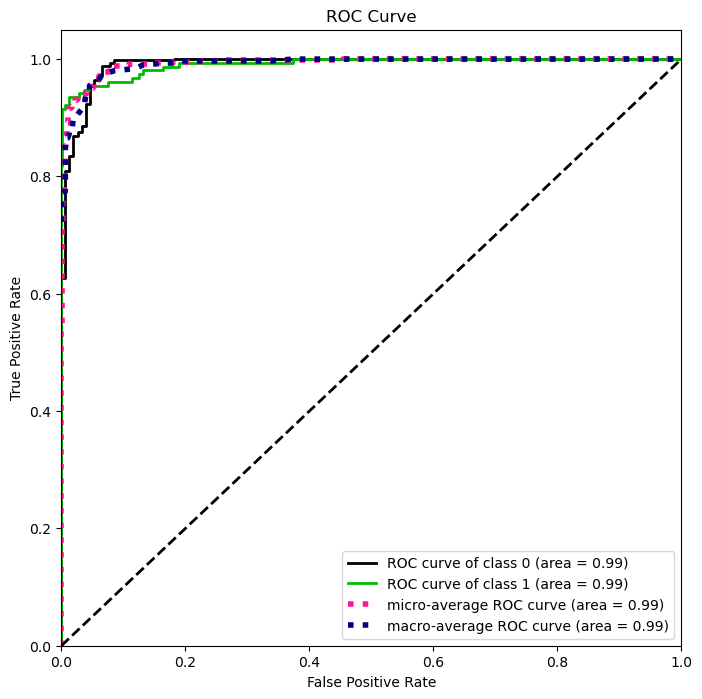

In [21]:
import matplotlib.pyplot as plt
import scikitplot as skplt


y_probas = classifier.predict_proba(X_test_vectorized)
skplt.metrics.plot_roc(y_test, y_probas, title='ROC Curve', figsize=(8, 8))
plt.show()

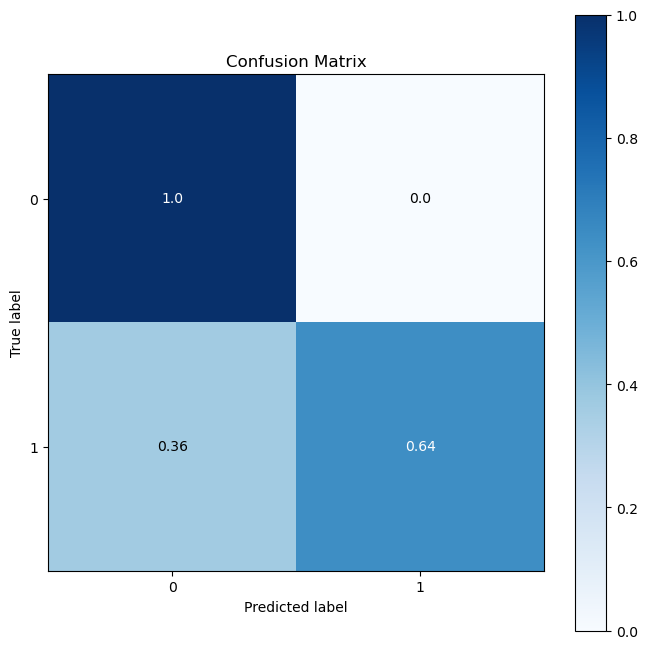

In [22]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title='Confusion Matrix', figsize=(8, 8))
plt.show()